In [1]:
# 必要のモジュールのインポート
import numpy as np # 線形代数
import pandas as pd # データの加工, CSVファイルの読み書き 
import matplotlib.pyplot as plt # グラフ生成
import seaborn as sns # 描画スタイル変更ライブラリ
color = sns.color_palette() # カラーパレット

%matplotlib inline

pd.options.mode.chained_assignment = None  # エラーメッセージOFF

In [2]:
# 各csvファイルの読み込み
#HomeCredit_columns_description = pd.read_csv("HomeCredit_columns_description.csv")
POS_CASH_balance = pd.read_csv("POS_CASH_balance.csv")
application_test = pd.read_csv("application_test.csv")
application_train = pd.read_csv("application_train.csv")
bureau = pd.read_csv("bureau.csv")
bureau_balance = pd.read_csv("bureau_balance.csv")
credit_card_balance = pd.read_csv("credit_card_balance.csv")
installments_payments = pd.read_csv("installments_payments.csv")
previous_application = pd.read_csv("previous_application.csv")
sample_submission = pd.read_csv("sample_submission.csv")

# 返済者と未返済者の割合

In [3]:
Target_count = application_train["TARGET"].value_counts()
Target_count

0    282686
1     24825
Name: TARGET, dtype: int64

Text(0.5, 1.0, 'Ratio Defaulter')

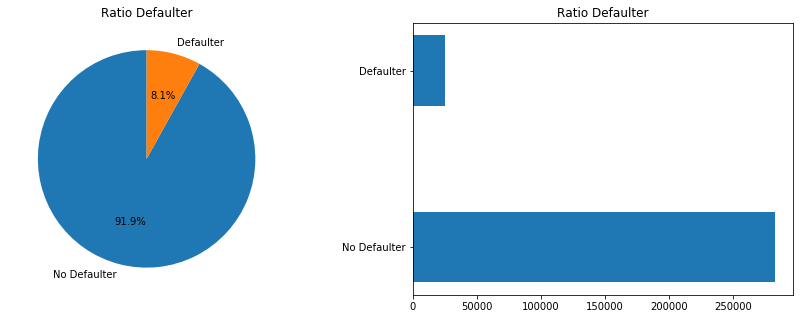

In [4]:
# 滞納者とそうでない人の割合
label = ["No Defaulter", "Defaulter"]
plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
plt.pie(np.array(Target_count), labels=label, startangle=90, autopct="%1.1f%%") # labels:ラベル startangle:開始角度 autopct:割合表示
plt.title("Ratio Defaulter")

plt.subplot(1,2,2)
plt.barh(label, Target_count, height=0.4)
plt.title("Ratio Defaulter")

# 男女の割合

In [5]:
Toatal = application_train["CODE_GENDER"].value_counts()

# 滞納者とそうでない人を分ける
difficulties_df = application_train[(application_train["TARGET"] == 1)] # 滞納者
other_cases_df = application_train[(application_train["TARGET"] == 0)] # 非滞納者

# 男女の数をカウント
difficulties_gender = difficulties_df["CODE_GENDER"].value_counts()
other_cases_gender = other_cases_df["CODE_GENDER"].value_counts()

Text(0.5, 1.0, 'No Defaulter')

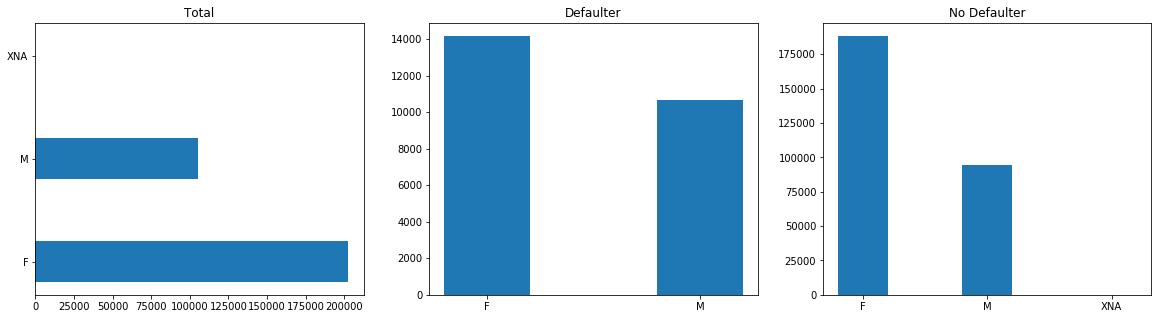

In [6]:
plt.figure(figsize=(20, 5))
plt.subplot(1,3,1)
plt.barh(Toatal.index, Toatal.values, height=0.4)
plt.title("Total")

plt.subplot(1,3,2)
plt.bar(difficulties_gender.index, difficulties_gender.values, width=0.4)
plt.title("Defaulter")

plt.subplot(1,3,3)
plt.bar(other_cases_gender.index, other_cases_gender.values, width=0.4)
plt.title("No Defaulter")

# 滞納者と非滞納者の平均収入

[169077.7222658179, 165611.76090634443]


Text(0.5, 1.0, 'Income_maen')

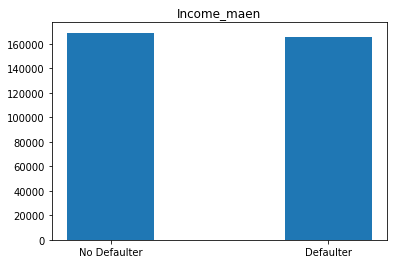

In [7]:
# 滞納者の平均収入を取得
Defaulter_Income_maen = difficulties_df["AMT_INCOME_TOTAL"].mean()

# 非滞納者の平均収入を取得
No_Defaulter_Income_maen = other_cases_df["AMT_INCOME_TOTAL"].mean()

Income_maen = []
Income_maen += [No_Defaulter_Income_maen, Defaulter_Income_maen]

print(Income_maen)

plt.bar(label, Income_maen, width=0.4)
plt.title("Income_maen")

# 滞納者と非滞納者の収入Top10比較

Text(0.5, 1.0, 'Top10 Income')

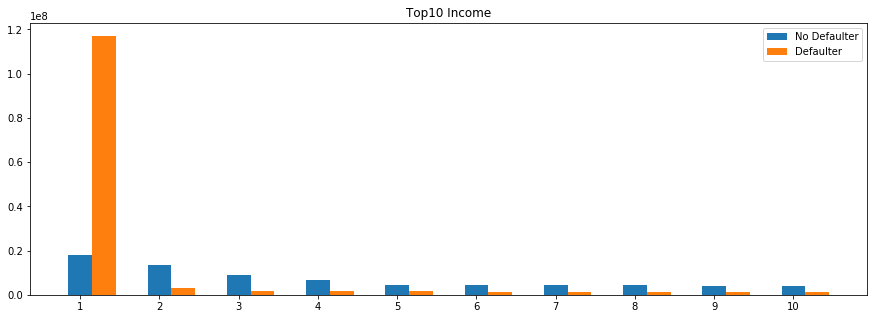

In [8]:
# 滞納者のTop10を取得
Defaulter_Income_top = difficulties_df["AMT_INCOME_TOTAL"].nlargest(10)

# 非滞納者の平均収入を取得
No_Defaulter_Income_top = other_cases_df["AMT_INCOME_TOTAL"].nlargest(10)

plt.figure(figsize=(15,5))
w = 0.3  #棒の幅
#plt.subplot(1,2,1)
plt.bar(np.arange(1,11,1), No_Defaulter_Income_top, width=w, label="No Defaulter")
plt.bar(np.arange(1,11,1) + w, Defaulter_Income_top, width=w, label="Defaulter")
plt.title("Top10 Defaulter Income")
plt.legend()
plt.xticks(np.arange(1,11,1))
plt.title("Top10 Income")

# 滞納者と非滞納者の収入Worst10比較

Text(0.5, 1.0, 'Top10 Income')

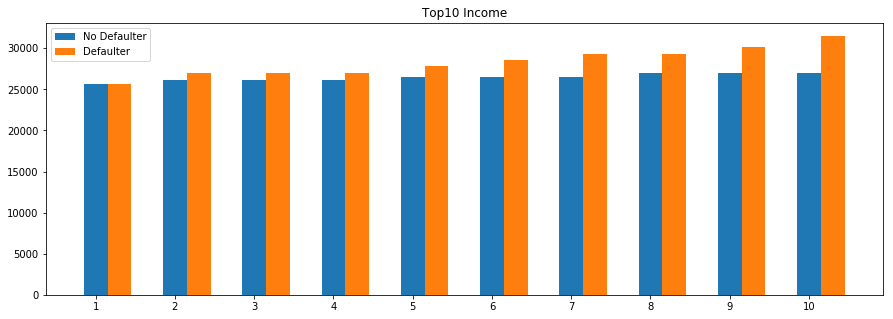

In [9]:
# 滞納者のTop10を取得
Defaulter_Income_Worst = difficulties_df["AMT_INCOME_TOTAL"].nsmallest(10)

# 非滞納者の平均収入を取得
No_Defaulter_Income_Worst = other_cases_df["AMT_INCOME_TOTAL"].nsmallest(10)

plt.figure(figsize=(15,5))
w = 0.3  #棒の幅
#plt.subplot(1,2,1)
plt.bar(np.arange(1,11,1), No_Defaulter_Income_Worst, width=w, label="No Defaulter")
plt.bar(np.arange(1,11,1) + w, Defaulter_Income_Worst, width=w, label="Defaulter")
plt.title("Top10 Defaulter Income")
plt.legend()
plt.xticks(np.arange(1,11,1))
plt.title("Top10 Income")

上記のグラフの結果から、返済可能、不可能に収入は関係ないことがわかる。ターゲットとの相関を見てみると

In [10]:
Result = application_train.corr()["TARGET"]
Result.loc["AMT_INCOME_TOTAL"]

-0.003981865601221981

相関が非常に低いことがわかる。

 # クライアントの収入の種類

No Defaulter Income Type
Working                 143550
Commercial associate     66257
Pensioner                52380
State servant            20454
Student                     18
Unemployed                  14
Businessman                 10
Maternity leave              3
Name: NAME_INCOME_TYPE, dtype: int64
Defaulter Income Type
Working                 15224
Commercial associate     5360
Pensioner                2982
State servant            1249
Unemployed                  8
Maternity leave             2
Name: NAME_INCOME_TYPE, dtype: int64


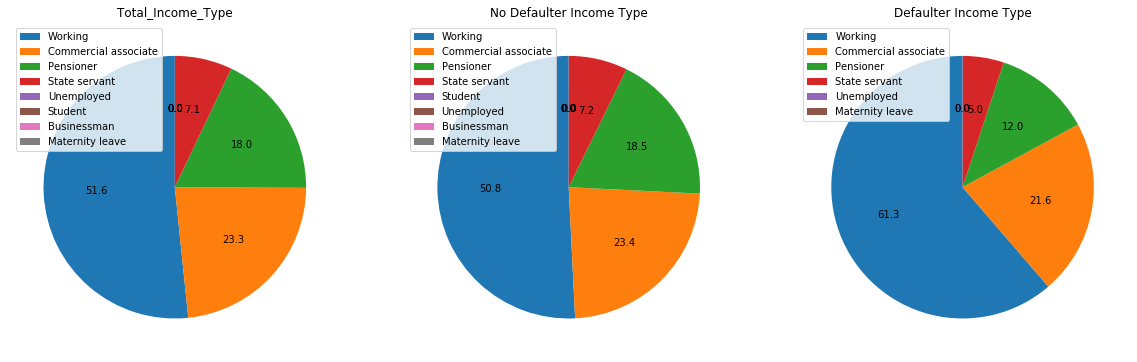

Text(0.5, 1.0, 'Defaulter Income Type')

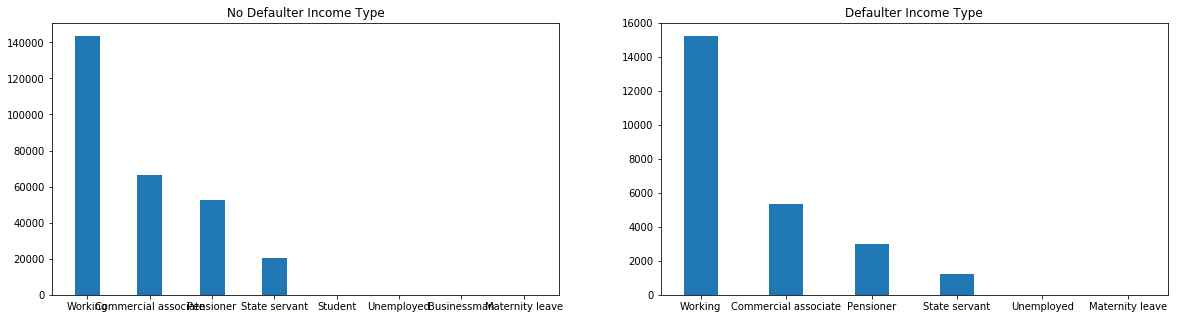

In [11]:
# 全体の収入種類割合
Total_Income_Type = application_train["NAME_INCOME_TYPE"].value_counts()
# 滞納者の収入種類割合
Defaulter_Income_Type = difficulties_df["NAME_INCOME_TYPE"].value_counts()
# 非滞納者の収入種類割合
No_Defaulter_Income_Type = other_cases_df["NAME_INCOME_TYPE"].value_counts()

print("No Defaulter Income Type")
print(No_Defaulter_Income_Type)
print("================================================")
print("Defaulter Income Type")
print(Defaulter_Income_Type)

# 円グラフ
plt.figure(figsize=(20,10))
plt.subplot(1,3,1)
plt.pie(np.array(Total_Income_Type.values), startangle=90, autopct="%.1f")
plt.legend(Total_Income_Type.index)
plt.title("Total_Income_Type")

plt.subplot(1,3,2)
plt.pie(np.array(No_Defaulter_Income_Type.values), startangle=90, autopct="%.1f")
plt.legend(No_Defaulter_Income_Type.index)
plt.title("No Defaulter Income Type")

plt.subplot(1,3,3)
plt.pie(np.array(Defaulter_Income_Type.values), startangle=90, autopct="%.1f")
plt.legend(Defaulter_Income_Type.index)
plt.title("Defaulter Income Type")
plt.show()

# 棒グラフ
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.bar(No_Defaulter_Income_Type.index, No_Defaulter_Income_Type.values, width=0.4)
plt.title("No Defaulter Income Type")

plt.subplot(1,2,2)
plt.bar(Defaulter_Income_Type.index, Defaulter_Income_Type.values, width=0.4)
plt.title("Defaulter Income Type")


滞納者場合は過半数以上が労働者であることがわかる。非滞納者は労働者が一番多いが年金受給の割合が多くなっている。

# 子供の人数

No Defaulter CHILDREN
0     198762
1      55665
2      24416
3       3359
4        374
5         77
6         15
7          7
14         3
19         2
12         2
10         2
8          2
Name: CNT_CHILDREN, dtype: int64
Defaulter CHILDREN
0     16609
1      5454
2      2333
3       358
4        55
5         7
6         6
9         2
11        1
Name: CNT_CHILDREN, dtype: int64


Text(0.5, 1.0, 'Defaulter CHILDREN')

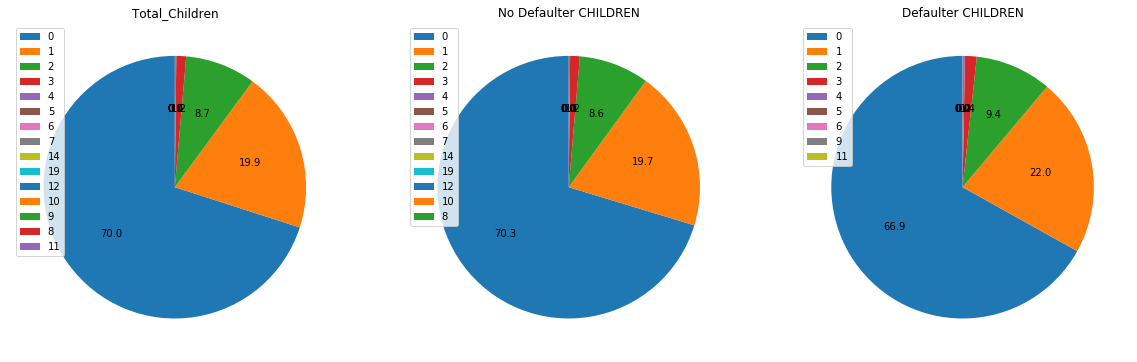

In [12]:
# 全体の収入種類割合
Total_Children = application_train["CNT_CHILDREN"].value_counts()
# 滞納者の収入種類割合
Defaulter_Children = difficulties_df["CNT_CHILDREN"].value_counts()
# 非滞納者の収入種類割合
No_Defaulter_children = other_cases_df["CNT_CHILDREN"].value_counts()

print("No Defaulter CHILDREN")
print(No_Defaulter_children)
print("================================================")
print("Defaulter CHILDREN")
print(Defaulter_Children)

plt.figure(figsize=(20,10))
plt.subplot(1,3,1)
plt.pie(Total_Children.values, startangle=90, autopct="%.1f")
plt.legend(Total_Children.index)
plt.title("Total_Children")

plt.subplot(1,3,2)
plt.pie(No_Defaulter_children.values, startangle=90, autopct="%.1f")
plt.legend(No_Defaulter_children.index)
plt.title("No Defaulter CHILDREN")

plt.subplot(1,3,3)
plt.pie(Defaulter_Children.values, startangle=90, autopct="%.1f")
plt.legend(Defaulter_Children.index)
plt.title("Defaulter CHILDREN")

滞納者の家庭の方が子供がいる家庭が多いことがわかるが、滞納者と非滞納者の明確な差はない。

# ターゲットと分散値

In [13]:
Top10_Target = application_train.corr()["TARGET"].abs().nlargest(10)
Top10_Target

TARGET                         1.000000
EXT_SOURCE_3                   0.178919
EXT_SOURCE_2                   0.160472
EXT_SOURCE_1                   0.155317
DAYS_BIRTH                     0.078239
REGION_RATING_CLIENT_W_CITY    0.060893
REGION_RATING_CLIENT           0.058899
DAYS_LAST_PHONE_CHANGE         0.055218
DAYS_ID_PUBLISH                0.051457
REG_CITY_NOT_WORK_CITY         0.050994
Name: TARGET, dtype: float64

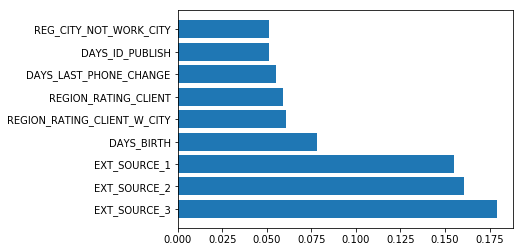

In [14]:
# ターゲットに絞った分散
x = Top10_Target.index
y = Top10_Target.values

plt.barh(x[1:],y[1:], align="center")
plt.show()

上図からターゲットとの相関が高いのは外部ソースからのが高いことがわかる。それ以外では、「DAYS_BIRTH」が高い。別のデータセットとターゲットの相関を見てみよう。

In [15]:
# ターゲットとビューローをマージ
target_bureau = pd.merge(application_train.loc[:,["SK_ID_CURR", "TARGET"]], bureau, on="SK_ID_CURR")

# 相関値を表示
Top10_bureau = target_bureau.corr()["TARGET"].abs().nlargest(10)
Top10_bureau

TARGET                    1.000000
DAYS_CREDIT               0.061556
DAYS_CREDIT_UPDATE        0.041076
DAYS_ENDDATE_FACT         0.039057
DAYS_CREDIT_ENDDATE       0.026497
AMT_CREDIT_SUM            0.010606
SK_ID_BUREAU              0.009018
AMT_CREDIT_SUM_OVERDUE    0.006253
AMT_CREDIT_SUM_LIMIT      0.005990
SK_ID_CURR                0.003024
Name: TARGET, dtype: float64

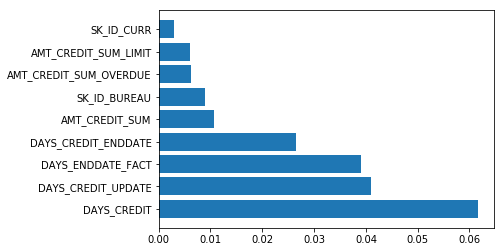

In [16]:
# ターゲットに絞った分散
x = Top10_bureau.index
y = Top10_bureau.values
plt.barh(x[1:],y[1:], align="center")
plt.show()

bureauファイルからでは「DAYS_CREDIT」が一番高く、続いて「DAYS_CREATE_UPDATE」が高くなっている。この結果から説明変数として使用できそうなのは「AMT_CREDIT_SUM」、「AMT_CREDIT_SUM_OVERDUE」なので、これらについて見ていく。

Text(0.5, 1.0, 'Defaulter Income Type')

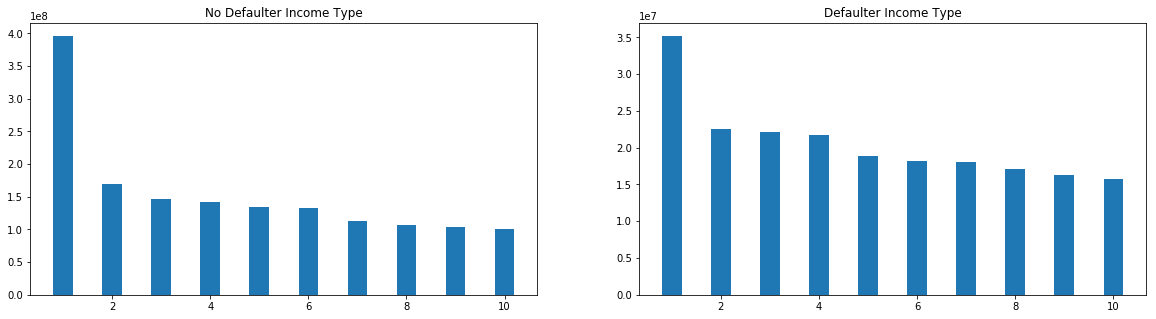

In [27]:
# 利用可能枠 最大値
# 滞納者とそうでない人を分ける
Tar_Bu_Def = target_bureau[(target_bureau["TARGET"] == 1)] # 滞納者
Tar_Bu_No_Def = target_bureau[(target_bureau["TARGET"] == 0)] # 非滞納者

# SK_ID_CURRとAMT_CREDIT_SUMを抽出
Tar_Bu_Def_Sum = Tar_Bu_Def.loc[:,["SK_ID_CURR", "AMT_CREDIT_SUM"]]
Tar_Bu_Def_Sum_Max = Tar_Bu_Def_Sum.groupby(["SK_ID_CURR"]).max()

# SK_ID_CURRとAMT_CREDIT_SUMを抽出
Tar_Bu_No_Def_Sum  = Tar_Bu_No_Def.loc[:,["SK_ID_CURR", "AMT_CREDIT_SUM"]]
Tar_Bu_No_Def_Sum_Max = Tar_Bu_No_Def_Sum.groupby(["SK_ID_CURR"]).max()

Tar_Bu_No_Def_Sum_Max["AMT_CREDIT_SUM"].nlargest(10)

# 支払い困難者の信用枠の平均
# 棒グラフ
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.bar(np.arange(1,11,1), Tar_Bu_No_Def_Sum_Max["AMT_CREDIT_SUM"].nlargest(10), width=0.4)
plt.title("No Defaulter Income Type")

plt.subplot(1,2,2)
plt.bar(np.arange(1,11,1), Tar_Bu_Def_Sum_Max["AMT_CREDIT_SUM"].nlargest(10), width=0.4)
plt.title("Defaulter Income Type")